In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

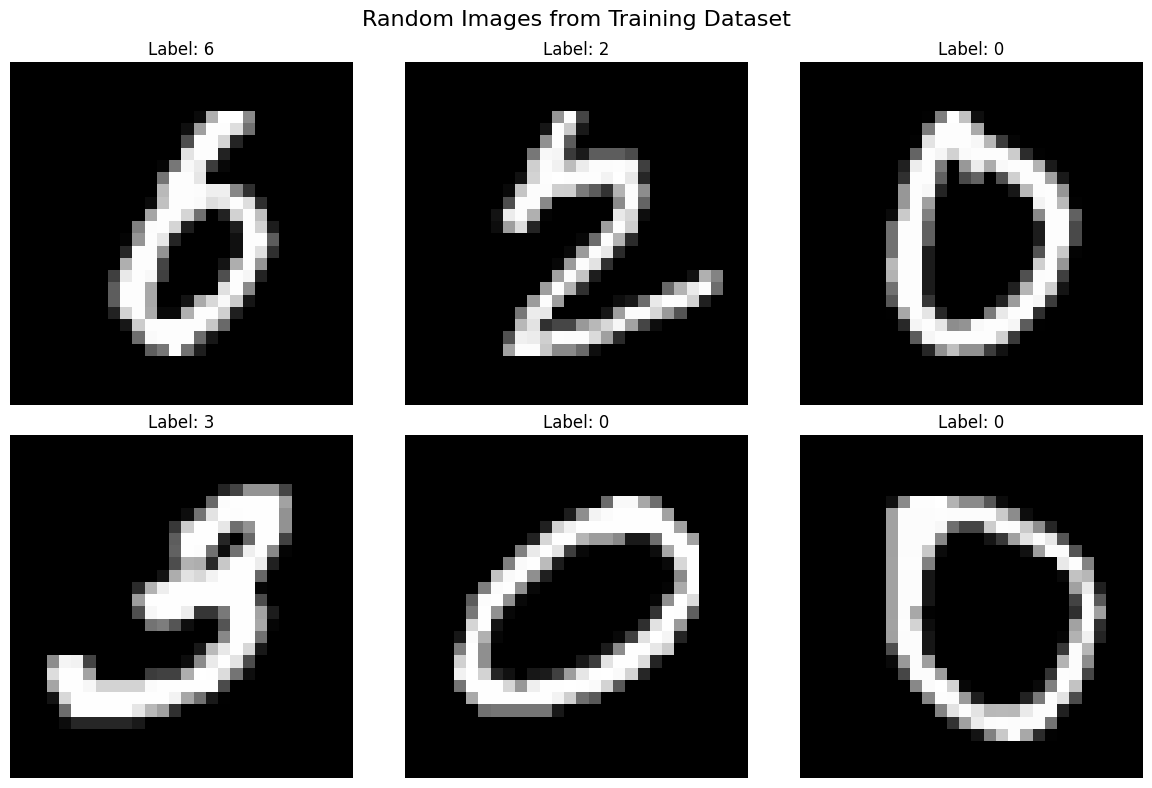

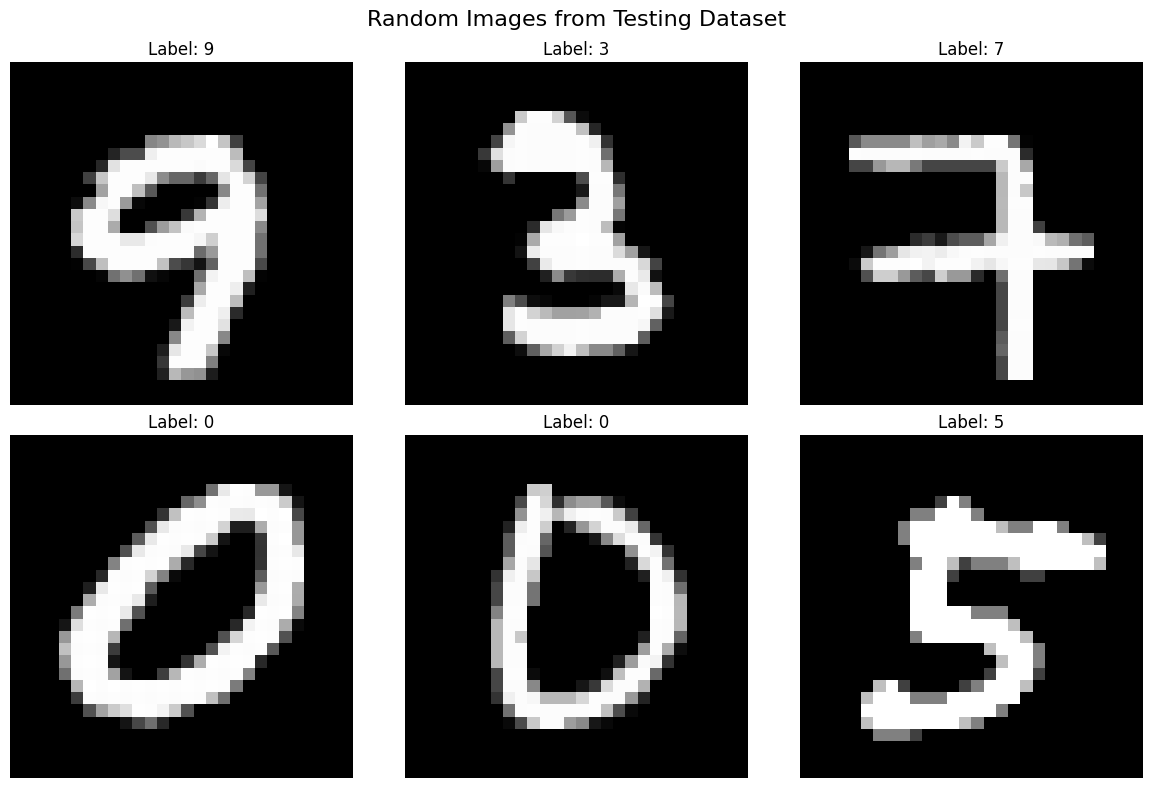

In [ ]:
def display_random_images(x_data, y_data, dataset_name):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f'Random Images from {dataset_name} Dataset', fontsize=16)
    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(0, len(x_data))

        ax.imshow(x_data[idx].reshape(28, 28), cmap='gray')

        ax.set_axis_off()

        ax.set_title(f'Label: {y_data[idx]}')

    plt.tight_layout()
    plt.show()

display_random_images(x_train, y_train, 'Training')

display_random_images(x_test, y_test, 'Testing')


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (since the images are grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.1634 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0248 - accuracy: 0.9920
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0244 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


In [ ]:
# Adding a callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>0.96:
            print("\nReached 96% accuracy so stopping training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Build the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, epochs=10,  callbacks=[callbacks])

# Evaluate the model
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9875
Reached 96% accuracy so stopping training!
313/313 [==============================] - 3s 8ms/step - loss: 0.0418 - accuracy: 0.9873
Test accuracy: 0.9872999787330627
